In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

W poniższym przykładzie posłużymy się zestawem danych reklamowych, obejmującym sprzedaż produktów i ich budżet reklamowy w trzech różnych mediach telewizyjnych, radiu, gazetach.

In [97]:
df_adv = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
x_population = df_adv[['TV', 'radio', 'newspaper']]
y_population = df_adv['sales']
df_adv.head()
## fit a OLS model with intercept on TV and Radio
#X = sm.add_constant(X)
#est = sm.OLS(y, X).fit()
#est.summary()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


# Zadanie 1
wykonaj model pozwalający przewidzieć zmienną "Sales" na podstawie innych zmiennych.

Wykonaj kilka modeli i je porównaj.

In [23]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [20]:
Res1 = sm.OLS(y_population, x_population).fit()

In [99]:
print(Res1.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.982    
Dependent Variable: sales            AIC:                853.0824 
Date:               2018-05-20 15:18 BIC:                862.9773 
No. Observations:   200              Log-Likelihood:     -423.54  
Df Model:           3                F-statistic:        3566.    
Df Residuals:       197              Prob (F-statistic): 2.43e-171
R-squared:          0.982            Scale:              4.1068   
--------------------------------------------------------------------
              Coef.    Std.Err.      t      P>|t|    [0.025   0.975]
--------------------------------------------------------------------
TV            0.0538     0.0013   40.5067   0.0000   0.0512   0.0564
radio         0.2222     0.0094   23.5951   0.0000   0.2037   0.2408
newspaper     0.0168     0.0067    2.5170   0.0126   0.0036   0.0300
------------------------------------------------------------------


In [98]:
est = smf.ols(formula='sales ~ np.log(TV) + radio + I(radio):I(TV)', data=df_adv).fit()
print(est.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.997    
Dependent Variable: sales            AIC:                94.7639  
Date:               2018-05-20 15:18 BIC:                107.9572 
No. Observations:   200              Log-Likelihood:     -43.382  
Df Model:           3                F-statistic:        1.952e+04
Df Residuals:       196              Prob (F-statistic): 2.10e-242
R-squared:          0.997            Scale:              0.092195 
-------------------------------------------------------------------
                 Coef.   Std.Err.     t     P>|t|    [0.025  0.975]
-------------------------------------------------------------------
Intercept        0.1886    0.1676   1.1251  0.2619  -0.1420  0.5192
np.log(TV)       1.9670    0.0345  57.0412  0.0000   1.8990  2.0350
radio            0.0458    0.0026  17.4101  0.0000   0.0406  0.0510
I(radio):I(TV)   0.0010    0.0000  72.7562  0.0000   0.0010  0.0011
-----

# Zadanie 2
naucz model postaci "Sales ~ TV + Radio"
i zwizualizuj to n wykresie 2d.

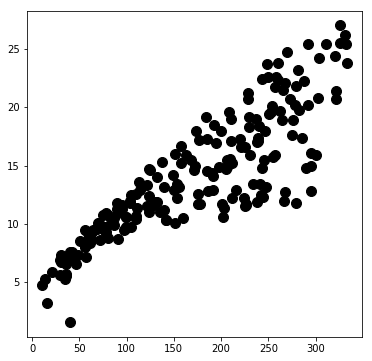

In [92]:
plt.figure(figsize=(6,6));
axes = plt.gca()

plt.plot(x_population['TV'] + x_population['radio'], y_population, 'ok', ms=10);

plt.show()

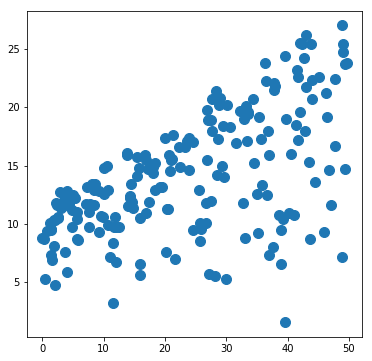

In [53]:
plt.figure(figsize=(6,6));
axes = plt.gca()

plt.plot(x_population['radio'], y_population, 'o', ms=10);

plt.show()

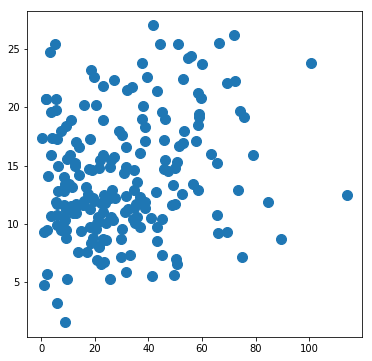

In [51]:
plt.figure(figsize=(6,6));
axes = plt.gca()

plt.plot(x_population['newspaper'], y_population, 'o', ms=10);

plt.show()